# From the lecture

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D


from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

np.random.seed(2012)

C:\Users\sushil.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Set some parameters

In [13]:
batch_size = 256
num_classes = 10
# epochs = 100
epochs = 10

### Step 2) Load prepare data¶

In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('X_train shape : ', x_train.shape)
print(x_train.shape[0], ' train samples')



X_train shape :  (50000, 32, 32, 3)
50000  train samples


### Prepare Data

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


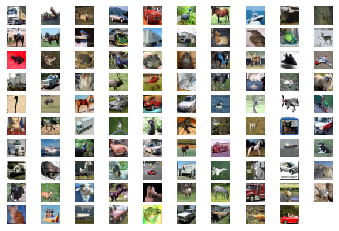

In [5]:
import matplotlib.pyplot  as plt

%matplotlib inline

plt.figure()
fig_size = [20, 20]

plt.rcParams["figure.figsize"] = fig_size

idx = 0

for idx in range(1, 100):
    ax = plt.subplot(10, 10, idx)
    img = x_train[idx, :, :, :]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    plt.imshow(img, cmap="Greys_r")
plt.show()
  

In [7]:
# img = x_train[1, :, :, :]
# plt.imshow(img, cmap="Greys_r")
# plt.show()

### Pre process class labels

In [8]:
#Convert One Hot Encoding
y_test = np_utils.to_categorical(y_test,  num_classes)
y_train = np_utils.to_categorical(y_train,  num_classes)
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(50000, 10)


### Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False, #set input mean to 0 over dataset
    samplewise_center=False, #set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, #divide each input by its std
    zca_whitening=False, #apply ZCA whitening
    rotation_range=0., # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) 
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, 
    vertical_flip=False,
)


## Step 3) Define Model architecture 
![alt text](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/lenet-5-825x285.png?x64257)

In [10]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


### Step 4) Compile model

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adagrad',
             metrics=['accuracy'])

#### Summary of model

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Step 5) Fit model on training data

In [14]:
#Compute quantaties required for feature-wise normalization
#(std, mean, and principle component if zca whitening is applied)

datagen.fit(x_train)

# Fit the model on the batches generated by datagen flow
model.fit_generator(datagen.flow(x_train, y_train,
                                batch_size = batch_size),
                   steps_per_epoch = x_train.shape[0] // batch_size,
                   epochs=epochs,
                   validation_data=(x_test, y_test))

Epoch 1/10
195/195 [==============================] - 488s 3s/step - loss: 2.1265 - acc: 0.2148 - val_loss: 1.7268 - val_acc: 0.3726
Epoch 2/10
195/195 [==============================] - 486s 2s/step - loss: 1.6527 - acc: 0.3991 - val_loss: 1.3809 - val_acc: 0.4946
Epoch 3/10
195/195 [==============================] - 487s 2s/step - loss: 1.4611 - acc: 0.4707 - val_loss: 1.2671 - val_acc: 0.5413
Epoch 4/10
195/195 [==============================] - 487s 2s/step - loss: 1.3589 - acc: 0.5108 - val_loss: 1.1932 - val_acc: 0.5760
Epoch 5/10
195/195 [==============================] - 488s 3s/step - loss: 1.2827 - acc: 0.5426 - val_loss: 1.1438 - val_acc: 0.5909
Epoch 6/10
195/195 [==============================] - 485s 2s/step - loss: 1.2285 - acc: 0.5613 - val_loss: 1.0837 - val_acc: 0.6141
Epoch 7/10
195/195 [==============================] - 485s 2s/step - loss: 1.1801 - acc: 0.5809 - val_loss: 1.0796 - val_acc: 0.6143
Epoch 8/10
195/195 [==============================] - 484s 2s/step - 

In [15]:
#Save model
model.save('cnn.h5')

In [16]:
import keras
model = keras.models.load_model('./cnn.h5')

In [17]:
prd = model.predict(x_test)

In [18]:
prd_y = np.argmax(prd, axis=1)
y_test = np.argmax(y_test, axis=1)

print(prd_y[0:10])
print(y_test[0:10])

[3 8 8 0 6 6 1 6 3 1]
[3 8 8 0 6 6 1 6 3 1]


In [19]:
nb_correct_labels = np.sum(prd_y == y_test)
print("Test accuracy is : ", nb_correct_labels/len(y_test))

Test accuracy is :  0.6609
